## Implementação de uma MLP para Reconhecimento de Dígitos

Este material didático aborda a implementação de uma Rede Multilayer Perceptron (MLP) para o reconhecimento de dígitos, utilizando o dataset MNIST. O processo será dividido em etapas, com commits individuais no GitHub para facilitar o acompanhamento do desenvolvimento.

### 1. Carregamento do Dataset MNIST

O primeiro passo é carregar o dataset MNIST, que contém imagens de dígitos escritos à mão. Utilizaremos o Keras para facilitar o carregamento:


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### 2. Normalização e Pré-processamento dos Dados

Para melhorar o desempenho da MLP, é importante normalizar os dados, convertendo os pixels para valores entre 0 e 1:

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

As imagens do MNIST são em escala de cinza, com pixels variando de 0 (preto) a 255 (branco). Para normalizar esses valores, convertemos cada pixel para um valor entre 0 e 1. Isso é feito dividindo o valor de cada pixel por 255.0. Ao dividir os pixels por 255, obtemos valores decimais. Para representar esses valores, é necessário um tipo de dado que suporte números de ponto flutuante. O float32 é um tipo de dado de ponto flutuante de 32 bits, que oferece precisão suficiente para representar os valores normalizados dos pixels.

### 3. Construção da MLP usando Keras

Com os dados preparados, podemos construir a MLP utilizando o Keras. Definiremos uma arquitetura simples, com duas camadas ocultas:

In [2]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### 4. Definição de Hiperparâmetros Fixos

Para este exemplo, definiremos os seguintes hiperparâmetros fixos:

*   **Camadas**: 2 camadas ocultas
*   **Função de Ativação**: ReLU para as camadas ocultas e Softmax para a camada de saída
*   **Taxa de Aprendizado**: 0.001


### 5. Compilação

Com a arquitetura definida, podemos compilar o modelo, especificando a função de perda, otimizador e métricas:

In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Em seguida, treinamos o modelo com os dados de treinamento:

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

# Carregamento dos dados
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalização e pré-processamento
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# Construção do modelo
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compilação do modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinamento do modelo
model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8769 - loss: 0.4418
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9632 - loss: 0.1217
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9761 - loss: 0.0790
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9830 - loss: 0.0588
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9865 - loss: 0.0445
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9900 - loss: 0.0333
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9920 - loss: 0.0263
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9938 - loss: 0.0203
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9945 - loss: 0.0189
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9958 - loss: 0.0144


### 6. Avaliação do Modelo

Após o treinamento, avaliamos o desempenho do modelo com os dados de teste:

In [13]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Loss:', loss)
print('Accuracy:', accuracy)

Loss: 0.07871919870376587
Accuracy: 0.9794999957084656


### 7. Visualização dos Resultados

Para melhor compreensão dos resultados, podemos gerar gráficos de acurácia e perda ao longo das épocas:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8732 - loss: 0.4397 - val_accuracy: 0.9621 - val_loss: 0.1304
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9659 - loss: 0.1176 - val_accuracy: 0.9704 - val_loss: 0.0969
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9747 - loss: 0.0823 - val_accuracy: 0.9747 - val_loss: 0.0814
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9805 - loss: 0.0604 - val_accuracy: 0.9769 - val_loss: 0.0778
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9873 - loss: 0.0427 - val_accuracy: 0.9752 - val_loss: 0.0800
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9900 - loss: 0.0321 - val_accuracy: 0.9787 - val_loss: 0.0763
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9920 - loss: 0.0261 - val_accuracy: 0.9784 - val_loss: 0.0758
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9946 - loss: 0.0

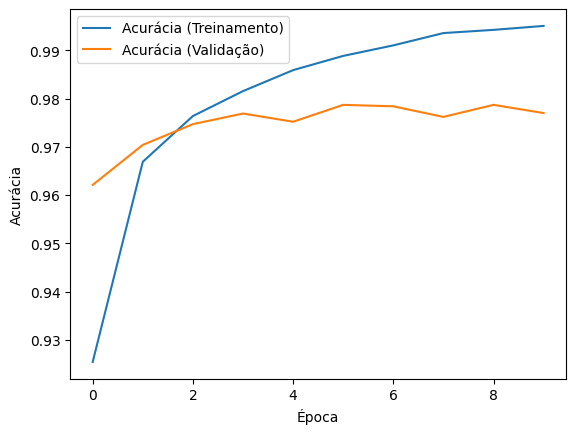

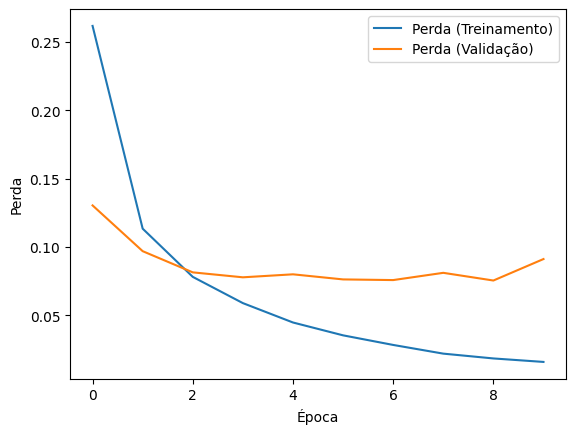

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Carregamento dos dados
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalização e pré-processamento
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# Construção do modelo
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compilação do modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinamento do modelo with validation data
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

print(history.history.keys()) # Print keys to verify

# Visualização dos resultados
plt.plot(history.history['accuracy'], label='Acurácia (Treinamento)')
plt.plot(history.history['val_accuracy'], label='Acurácia (Validação)')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Perda (Treinamento)')
plt.plot(history.history['val_loss'], label='Perda (Validação)')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()
plt.show()

Este código irá gerar uma grade 2x5, exibindo os 10 primeiros dígitos do conjunto de treinamento, juntamente com suas respectivas labels.

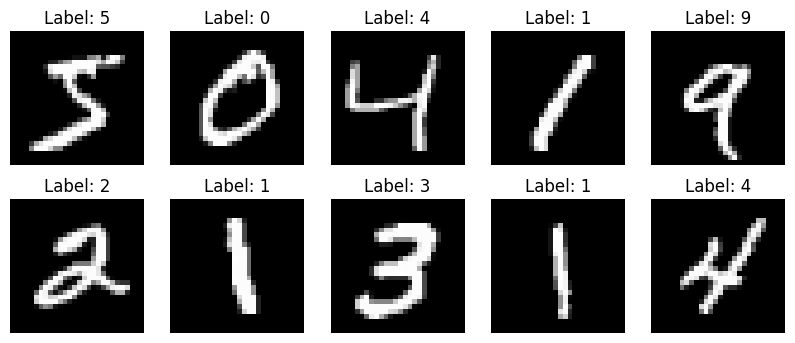

In [16]:
import matplotlib.pyplot as plt

# Carrega os dados do MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Exibe os 10 primeiros dígitos
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(f'Label: {y_train[i]}')
    ax.axis('off')
plt.show()